In [68]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
df.shape

(5572, 2)

In [71]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [73]:
df['Category'] = df.Category.map({'ham' : 0, 'spam' : 1})
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
df.duplicated().sum()

415

In [75]:
df = df.drop_duplicates(keep = 'first')
df.shape

(5157, 2)

In [76]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

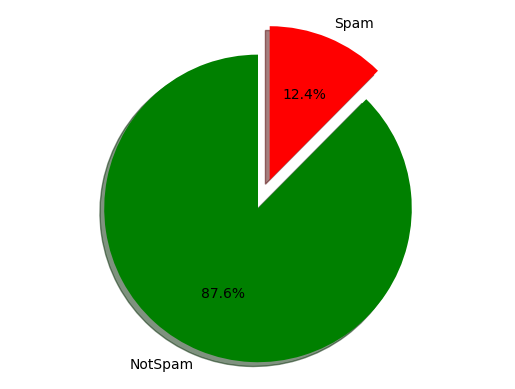

In [77]:
count_Class = pd.value_counts(df.Category, sort = True) 
labels = 'NotSpam', 'Spam' 
sizes = [count_Class[0], count_Class[1]] 
colors = ['green', 'red'] 
explode = (0.1, 0.1) 
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90) 
plt.axis('equal')
plt.show()

In [135]:
import nltk
from nltk.corpus import stopwords
import string

In [122]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\JASHWANTH KUMAR
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\JASHWANTH KUMAR
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [123]:
df['num_of_characters'] = df['Message'].apply(len)

In [124]:
df['num_of_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [125]:
df['num_of_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [126]:
df.head()

,Category,Message,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [127]:
df[df['Category'] == 0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [128]:
df[df['Category'] == 0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [129]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [136]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [137]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [138]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [141]:
count_vector = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['Category'].values

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state = 2)

In [150]:
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
svc = SVC()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [151]:
models = { 'DecisionTree': dtc,  'LogisticRegression': lrc,  'RandomForest': rfc, 'SVC' : svc,'MultinomialNB': mnb, 'BernoulliNB': bnb }

In [152]:
def train_classifier(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [153]:
accuracy_scores = []
precision_scores = []

for name,model in models.items():
    
    current_accuracy,current_precision = train_classifier(model, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  DecisionTree
Accuracy -  0.935077519379845
Precision -  0.8125
For  LogisticRegression
Accuracy -  0.9602713178294574
Precision -  0.967391304347826
For  RandomForest
Accuracy -  0.9728682170542635
Precision -  1.0
For  SVC
Accuracy -  0.9738372093023255
Precision -  1.0
For  MultinomialNB
Accuracy -  0.9709302325581395
Precision -  1.0
For  BernoulliNB
Accuracy -  0.9835271317829457
Precision -  0.9824561403508771


In [157]:
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()

In [158]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb)],voting='soft')

In [159]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [161]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806201550387597
Precision 0.9908256880733946
